In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df_test = pd.read_csv('input/house-prices-advanced-regression-techniques/test.csv')
df_train=pd.read_csv('input/house-prices-advanced-regression-techniques/train.csv')

In [4]:
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [5]:
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [6]:
print(df_train.columns)
print(len(df_train.columns),"fetures present in training dataset")


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
print(df_test.columns)
print(len(df_test.columns),"fetures present in testing dataset")


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
print(df_test.shape,"shape of testing dataset")
print(df_train.shape,"shape of training dataset")

(1459, 80) shape of testing dataset
(1460, 81) shape of training dataset


In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [11]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [12]:
df_train.duplicated().sum()

0

In [13]:
df_test.duplicated().sum()

0

In [14]:
print(df_train.isnull().sum())
print('-----------')
print('-----------')
print('-----------')
print(df_test.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64
-----------
-----------
-----------
Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64


In [15]:
dataframe = pd.DataFrame(df_train.isnull().sum().sort_values(ascending=False))
 
print(dataframe.to_markdown())

|               |    0 |
|:--------------|-----:|
| PoolQC        | 1453 |
| MiscFeature   | 1406 |
| Alley         | 1369 |
| Fence         | 1179 |
| FireplaceQu   |  690 |
| LotFrontage   |  259 |
| GarageYrBlt   |   81 |
| GarageCond    |   81 |
| GarageType    |   81 |
| GarageFinish  |   81 |
| GarageQual    |   81 |
| BsmtFinType2  |   38 |
| BsmtExposure  |   38 |
| BsmtQual      |   37 |
| BsmtCond      |   37 |
| BsmtFinType1  |   37 |
| MasVnrArea    |    8 |
| MasVnrType    |    8 |
| Electrical    |    1 |
| Id            |    0 |
| Functional    |    0 |
| Fireplaces    |    0 |
| KitchenQual   |    0 |
| KitchenAbvGr  |    0 |
| BedroomAbvGr  |    0 |
| HalfBath      |    0 |
| FullBath      |    0 |
| BsmtHalfBath  |    0 |
| TotRmsAbvGrd  |    0 |
| GarageCars    |    0 |
| GrLivArea     |    0 |
| GarageArea    |    0 |
| PavedDrive    |    0 |
| WoodDeckSF    |    0 |
| OpenPorchSF   |    0 |
| EnclosedPorch |    0 |
| 3SsnPorch     |    0 |
| ScreenPorch   |    0 |


In [16]:
dataframe_test = pd.DataFrame(df_test.isnull().sum().sort_values(ascending=False))
print(dataframe_test.to_markdown())

|               |    0 |
|:--------------|-----:|
| PoolQC        | 1456 |
| MiscFeature   | 1408 |
| Alley         | 1352 |
| Fence         | 1169 |
| FireplaceQu   |  730 |
| LotFrontage   |  227 |
| GarageYrBlt   |   78 |
| GarageQual    |   78 |
| GarageFinish  |   78 |
| GarageCond    |   78 |
| GarageType    |   76 |
| BsmtCond      |   45 |
| BsmtQual      |   44 |
| BsmtExposure  |   44 |
| BsmtFinType1  |   42 |
| BsmtFinType2  |   42 |
| MasVnrType    |   16 |
| MasVnrArea    |   15 |
| MSZoning      |    4 |
| BsmtHalfBath  |    2 |
| Utilities     |    2 |
| Functional    |    2 |
| BsmtFullBath  |    2 |
| BsmtFinSF1    |    1 |
| BsmtFinSF2    |    1 |
| BsmtUnfSF     |    1 |
| KitchenQual   |    1 |
| TotalBsmtSF   |    1 |
| Exterior2nd   |    1 |
| GarageCars    |    1 |
| Exterior1st   |    1 |
| GarageArea    |    1 |
| SaleType      |    1 |
| MiscVal       |    0 |
| BedroomAbvGr  |    0 |
| KitchenAbvGr  |    0 |
| YrSold        |    0 |
| TotRmsAbvGrd  |    0 |


In [17]:
null=df_train.isnull().sum()/df_train.shape[0]*100
null

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64

In [18]:
dataframe_null = pd.DataFrame(null.sort_values(ascending=False))
print(dataframe_null.to_markdown())

|               |          0 |
|:--------------|-----------:|
| PoolQC        | 99.5205    |
| MiscFeature   | 96.3014    |
| Alley         | 93.7671    |
| Fence         | 80.7534    |
| FireplaceQu   | 47.2603    |
| LotFrontage   | 17.7397    |
| GarageYrBlt   |  5.54795   |
| GarageCond    |  5.54795   |
| GarageType    |  5.54795   |
| GarageFinish  |  5.54795   |
| GarageQual    |  5.54795   |
| BsmtFinType2  |  2.60274   |
| BsmtExposure  |  2.60274   |
| BsmtQual      |  2.53425   |
| BsmtCond      |  2.53425   |
| BsmtFinType1  |  2.53425   |
| MasVnrArea    |  0.547945  |
| MasVnrType    |  0.547945  |
| Electrical    |  0.0684932 |
| Id            |  0         |
| Functional    |  0         |
| Fireplaces    |  0         |
| KitchenQual   |  0         |
| KitchenAbvGr  |  0         |
| BedroomAbvGr  |  0         |
| HalfBath      |  0         |
| FullBath      |  0         |
| BsmtHalfBath  |  0         |
| TotRmsAbvGrd  |  0         |
| GarageCars    |  0         |
| GrLivA

In [19]:
col_to_drop = null[null>50].keys()
train_df=df_train.drop(col_to_drop, axis=1)


In [20]:
null_test=df_test.isnull().sum()/df_test.shape[0]*100
null_test

Id                0.000000
MSSubClass        0.000000
MSZoning          0.274160
LotFrontage      15.558602
LotArea           0.000000
                   ...    
MiscVal           0.000000
MoSold            0.000000
YrSold            0.000000
SaleType          0.068540
SaleCondition     0.000000
Length: 80, dtype: float64

In [21]:
dataframe_null_test = pd.DataFrame(null_test.sort_values(ascending=False))
print(dataframe_null_test.to_markdown())

|               |          0 |
|:--------------|-----------:|
| PoolQC        | 99.7944    |
| MiscFeature   | 96.5045    |
| Alley         | 92.6662    |
| Fence         | 80.1234    |
| FireplaceQu   | 50.0343    |
| LotFrontage   | 15.5586    |
| GarageYrBlt   |  5.34613   |
| GarageQual    |  5.34613   |
| GarageFinish  |  5.34613   |
| GarageCond    |  5.34613   |
| GarageType    |  5.20905   |
| BsmtCond      |  3.0843    |
| BsmtQual      |  3.01576   |
| BsmtExposure  |  3.01576   |
| BsmtFinType1  |  2.87868   |
| BsmtFinType2  |  2.87868   |
| MasVnrType    |  1.09664   |
| MasVnrArea    |  1.0281    |
| MSZoning      |  0.27416   |
| BsmtHalfBath  |  0.13708   |
| Utilities     |  0.13708   |
| Functional    |  0.13708   |
| BsmtFullBath  |  0.13708   |
| BsmtFinSF1    |  0.0685401 |
| BsmtFinSF2    |  0.0685401 |
| BsmtUnfSF     |  0.0685401 |
| KitchenQual   |  0.0685401 |
| TotalBsmtSF   |  0.0685401 |
| Exterior2nd   |  0.0685401 |
| GarageCars    |  0.0685401 |
| Exteri

In [22]:
col_to_drop_test= null_test[null_test>50].keys()
test_df=df_test.drop(col_to_drop, axis=1)

In [23]:
len(train_df.columns)

77

In [24]:
len(test_df.columns)

76

In [25]:
train_df.columns[train_df.isnull().any()]

Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond'],
      dtype='object')

In [26]:
len(train_df.columns[train_df.isnull().any()])

15

In [27]:
train_df.skew()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Id                0.000000
MSSubClass        1.407657
LotFrontage       2.163569
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.669084
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.649415
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
S

In [28]:
train_df['LotFrontage'] = train_df['LotFrontage'].fillna(train_df['LotFrontage'].mean())
train_df['MasVnrArea']  = train_df['MasVnrArea'].fillna(train_df['MasVnrArea'].mean())  
train_df['GarageYrBlt'] = train_df['GarageYrBlt'].fillna(train_df['GarageYrBlt'].median())

In [29]:
train_df['MasVnrType']   = train_df['MasVnrType'].fillna(train_df['MasVnrType'].mode()[0])  
train_df['BsmtQual']     = train_df['BsmtQual'].fillna(train_df['BsmtQual'].mode()[0])  
train_df['BsmtCond']     = train_df['BsmtCond'].fillna(train_df['BsmtCond'].mode()[0])  
train_df['BsmtExposure'] = train_df['BsmtExposure'].fillna(train_df['BsmtExposure'].mode()[0])  
train_df['BsmtFinType1'] = train_df['BsmtFinType1'].fillna(train_df['BsmtFinType1'].mode()[0])  
train_df['BsmtFinType2'] = train_df['BsmtFinType2'].fillna(train_df['BsmtFinType2'].mode()[0])  
train_df['Electrical']   = train_df['Electrical'].fillna(train_df['Electrical'].mode()[0])  
train_df['FireplaceQu']  = train_df['FireplaceQu'].fillna(train_df['FireplaceQu'].mode()[0])  
train_df['GarageType']   = train_df['GarageType'].fillna(train_df['GarageType'].mode()[0])  
train_df['GarageFinish'] = train_df['GarageFinish'].fillna(train_df['GarageFinish'].mode()[0]) 
train_df['GarageQual']   = train_df['GarageQual'].fillna(train_df['GarageQual'].mode()[0])  
train_df['GarageCond']   = train_df['GarageCond'].fillna(train_df['GarageCond'].mode()[0])  

In [30]:
train_df.isnull().values.sum()

0

In [31]:
test_df.fillna(test_df.mode().iloc[0],inplace=True)

In [32]:
test_df.isnull().values.sum()

0

In [33]:
train_df.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.009601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050199,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.357056,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022895,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.009601,-0.357056,1.000000,0.306795,0.234196,-0.052820,0.117598,0.082746,0.179283,0.215828,...,0.077106,0.137454,0.009790,0.062335,0.037684,0.180868,0.001168,0.010158,0.006768,0.334901
LotArea,-0.033226,-0.139781,0.306795,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103960,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.234196,0.105806,1.000000,-0.091932,0.572323,0.550684,0.410238,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.052820,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.127788,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.117598,0.014228,0.572323,-0.375983,1.000000,0.592855,0.314745,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.082746,0.013788,0.550684,0.073741,0.592855,1.000000,0.179186,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050199,0.022895,0.179283,0.103960,0.410238,-0.127788,0.314745,0.179186,1.000000,0.263582,...,0.159349,0.124965,-0.109849,0.018795,0.061453,0.011723,-0.029815,-0.005940,-0.008184,0.475241
BsmtFinSF1,-0.005024,-0.069836,0.215828,0.214103,0.239666,-0.046231,0.249503,0.128451,0.263582,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


<AxesSubplot:>

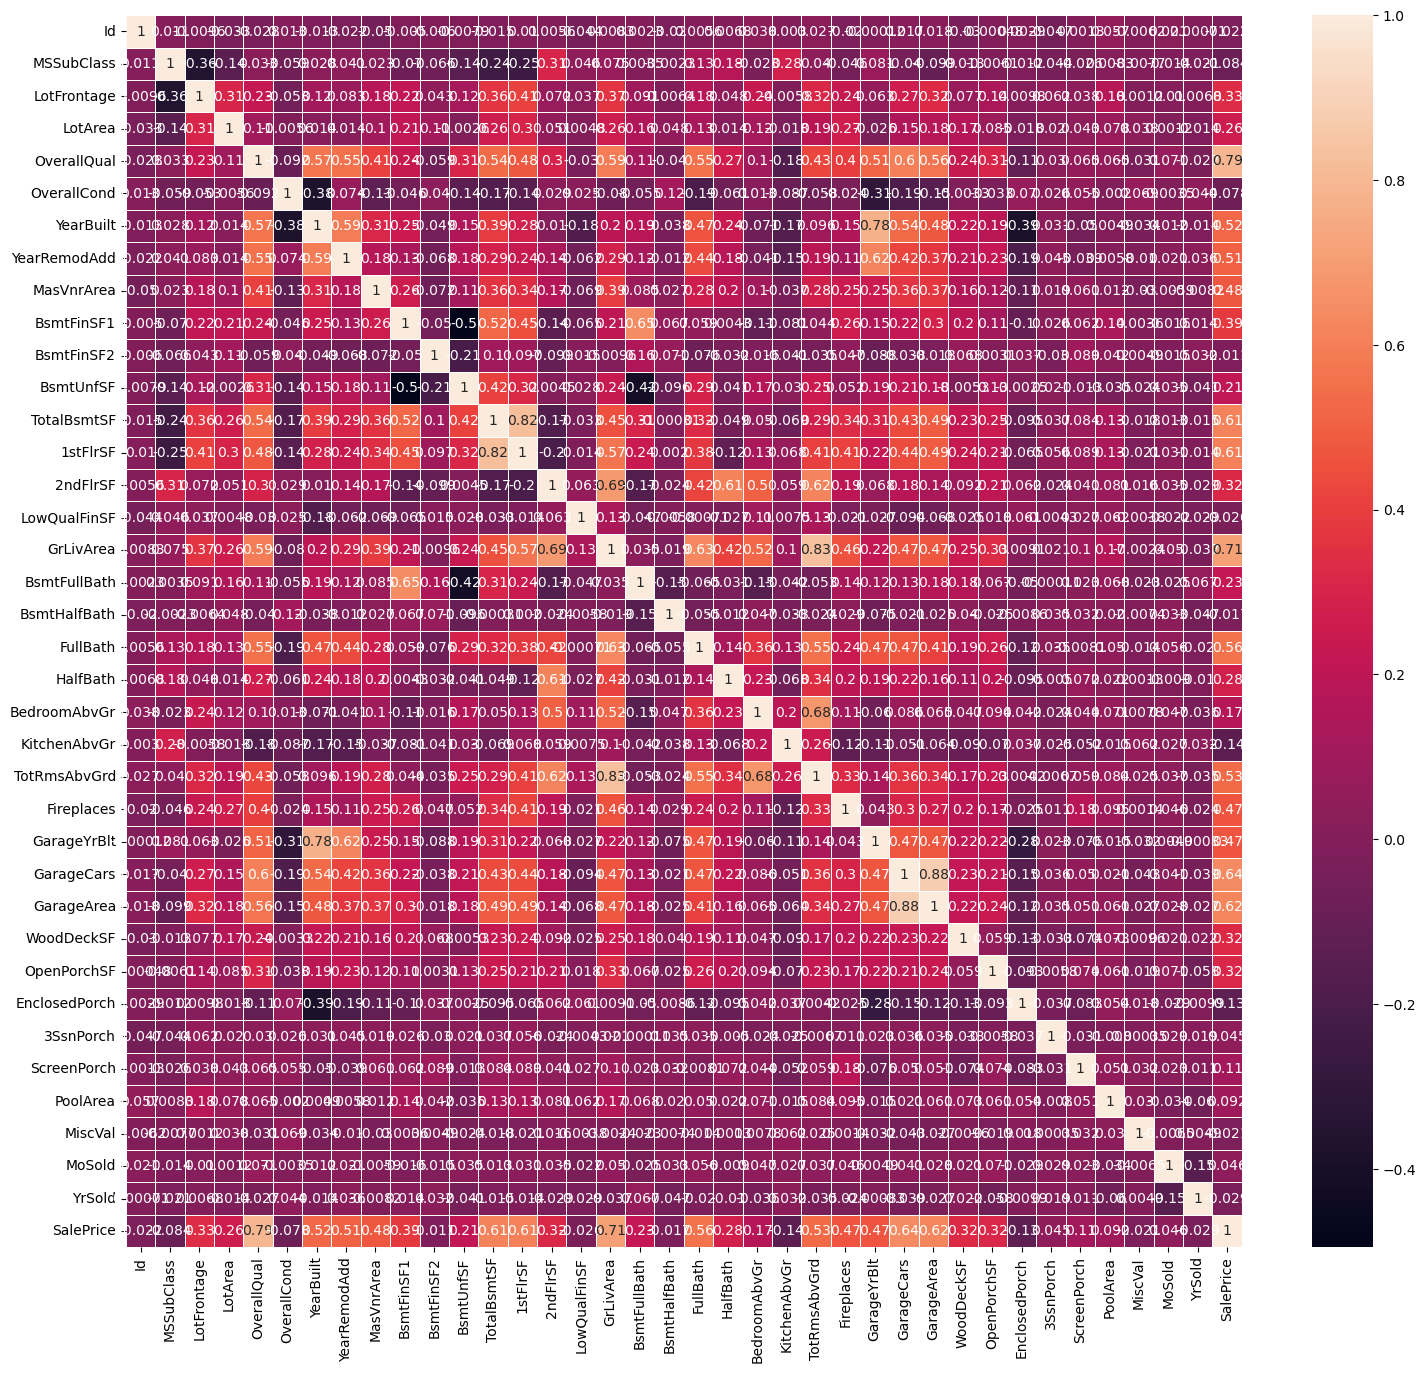

In [34]:
plt.figure(figsize=(18,16))
sns.heatmap(train_df.corr(),annot=True,linewidth=.7,)

In [35]:
corr=train_df.corr()

high_corr_features=corr.index[abs(corr['SalePrice'])>0.50]
print(f'highly correlated feature:\n',high_corr_features)
print(f'No. of highly correlated features:',len(high_corr_features))

highly correlated feature:
 Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object')
No. of highly correlated features: 11


<AxesSubplot:>

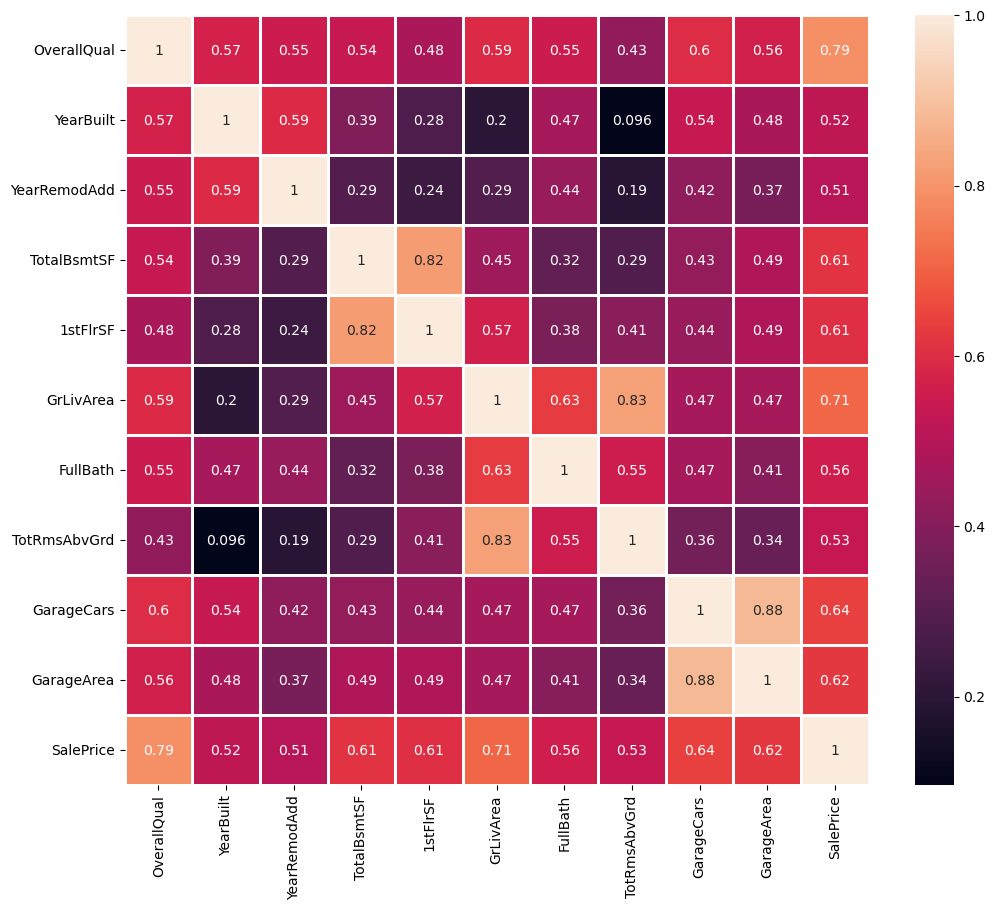

In [36]:
plt.figure(figsize=(12,10))
sns.heatmap(train_df[high_corr_features].corr(),annot=True,linewidth=2,)

In [37]:
train_df=pd.get_dummies(train_df,drop_first=True)
print(f'Train shape: {train_df.shape}')

Train shape: (1460, 238)


In [38]:
test_df=pd.get_dummies(test_df,drop_first=True)
print(f'Test shape: {test_df.shape}')

Test shape: (1459, 221)


In [39]:
len(train_df.select_dtypes(include='object').columns)
len(test_df.select_dtypes(include='object').columns)

0

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [41]:
X=train_df[high_corr_features.drop('SalePrice')]
y=train_df[['SalePrice']]

In [42]:
test_df=test_df[high_corr_features.drop('SalePrice')]

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [44]:
print( X_train.shape, X_test.shape)

(1022, 10) (438, 10)


In [45]:
scaler = StandardScaler()

In [46]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
test_df=scaler.fit_transform(test_df)

In [47]:
from sklearn.linear_model import LinearRegression

#Create an instance of a LinearRegression() model named lm.

In [48]:
lr = LinearRegression()

In [49]:
lr.fit(X_train,y_train)

LinearRegression()

In [50]:
print('Coefficients: \n', lr.coef_)

Coefficients: 
 [[28675.69757771  8036.28534624  6165.42281318  4724.67360519
   7316.75943812 27831.92592271 -2887.47886429  -528.41766567
  10167.59018325   270.38796844]]


In [51]:
pred = lr.predict(X_test)

Text(0, 0.5, 'Predicted Y')

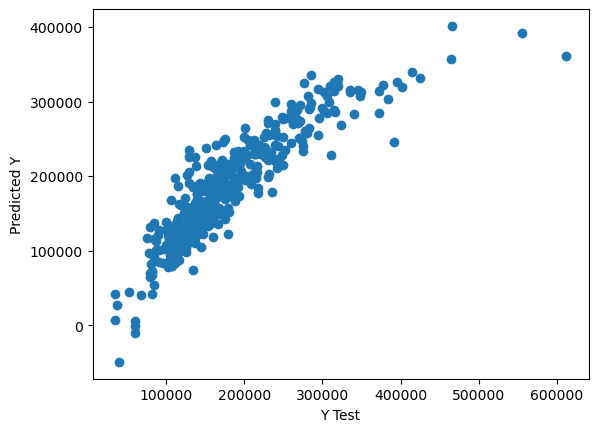

In [52]:
plt.scatter(y_test,pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [53]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 24663.437113693362
MSE: 1211360914.355967
RMSE: 34804.61053303092


In [54]:
prediction=lr.predict(test_df)
prediction.shape

(1459, 1)

In [55]:
print(prediction)

[[104546.02550148]
 [159520.58384972]
 [175226.22241615]
 ...
 [155197.25178107]
 [113346.67922417]
 [248447.19083362]]


In [56]:
ids = df_test['Id']

In [57]:
print(ids)

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64


In [58]:
Final = pd.DataFrame({"Id":ids})

In [59]:
Final = pd.DataFrame({"Sales Price":prediction.flatten()})

In [60]:
Final_sub = pd.DataFrame({"Id":ids,"SalePrice":prediction.flatten()})

In [61]:
Final_sub.head(10)

,Id,SalePrice
0,1461,104546.025501
1,1462,159520.583850
2,1463,175226.222416
3,1464,193598.677333
4,1465,222636.649625
5,1466,189262.391493
6,1467,178392.723552
7,1468,181554.766029
8,1469,211593.841514
9,1470,101736.149010


In [62]:
Final_sub.to_csv('submission.csv', index = 'None')